<a href="https://colab.research.google.com/github/pondels/CSE450/blob/main/Soren's_Module_4NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [4]:
# Load some test data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')


In [ ]:
# Import the libraries we need 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.get_dummies(df, columns=['hr'])



In [9]:
df.columns
df['total'] = df['casual'] + df['registered']
df.dteday = pd.to_datetime(df.dteday)
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year


Seperate the Features

In [ ]:
X = df.drop(columns=["casual",'dteday',"registered", 'total'])
y = df.drop(columns = ['dteday', 'holiday', 'workingday', 'weathersit', 'hum', 'windspeed',
                       'temp_c', 'feels_like_c', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
                       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
                       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
                       'hr_21', 'hr_22', 'hr_23', 'season'])

In [ ]:
X.columns

Index(['season', 'holiday', 'workingday', 'weathersit', 'hum', 'windspeed',
       'temp_c', 'feels_like_c', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'day', 'month', 'year'],
      dtype='object')

Pull out a block of days
7th, 14th, 21st

In [ ]:
X_test = X[(X['day'] == 7) | (X['day'] == 14) | (X['day'] == 21)]
X_train = X[(X['day'] != 7) | (X['day'] != 14) | (X['day'] != 21)]
y_test = y[(y['day'] == 7) | (y['day'] == 14) | (y['day'] == 21)]
y_train = y[(y['day'] != 7) | (y['day'] != 14) | (y['day'] != 21)]
y_train = y_train['total']
y_test = y_test['total']

In [ ]:
#X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)
X_train


,season,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,hr_0,hr_1,...,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,day,month,year
0,1,0,0,1,0.81,0,3.28,3.0014,1,0,...,0,0,0,0,0,0,0,1,1,2011
1,1,0,0,1,0.80,0,2.34,1.9982,0,1,...,0,0,0,0,0,0,0,1,1,2011
2,1,0,0,1,0.80,0,2.34,1.9982,0,0,...,0,0,0,0,0,0,0,1,1,2011
3,1,0,0,1,0.75,0,3.28,3.0014,0,0,...,0,0,0,0,0,0,0,1,1,2011
4,1,0,0,1,0.75,0,3.28,3.0014,0,0,...,0,0,0,0,0,0,0,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,4,0,1,1,0.66,0,7.04,7.0010,0,0,...,0,0,1,0,0,0,0,30,11,2012
16633,4,0,1,1,0.66,0,7.04,7.0010,0,0,...,0,0,0,1,0,0,0,30,11,2012
16634,4,0,1,1,0.75,6,6.10,5.0012,0,0,...,0,0,0,0,1,0,0,30,11,2012
16635,4,0,1,1,0.75,0,6.10,5.9978,0,0,...,0,0,0,0,0,1,0,30,11,2012


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
# model = Sequential()
# model.add(Dense(256, input_dim=len(X_train[0]), activation='sigmoid'))
# model.add(Dropout(.5))
# model.add(Dense(128, activation='gelu'))
# model.add(Dense(64, activation='linear'))


# model.add(Dense(1, activation='relu'))

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=len(X_train[0]), activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(.5))
model.add(Dense(64, activation='leaky_relu'))


model.add(Dense(1, activation='relu'))

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=100)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=30, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
361/361 [==============================] - 3s 5ms/step - loss: 17890.0352 - mse: 17890.0352 - val_loss: 50788.6836 - val_mse: 50788.6836
Epoch 2/2000
361/361 [==============================] - 2s 6ms/step - loss: 13073.7666 - mse: 13073.7666 - val_loss: 26171.7461 - val_mse: 26171.7461
Epoch 3/2000
361/361 [==============================] - 2s 5ms/step - loss: 9306.2285 - mse: 9306.2285 - val_loss: 22335.5488 - val_mse: 22335.5488
Epoch 4/2000
361/361 [==============================] - 1s 4ms/step - loss: 8718.1670 - mse: 8718.1670 - val_loss: 20677.7129 - val_mse: 20677.7129
Epoch 5/2000
361/361 [==============================] - 1s 4ms/step - loss: 8180.2959 - mse: 8180.2969 - val_loss: 19407.8887 - val_mse: 19407.8887
Epoch 6/2000
361/361 [==============================] - 2s 5ms/step - loss: 7933.9155 - mse: 7933.9155 - val_loss: 18131.7168 - val_mse: 18131.7168
Epoch 7/2000
361/361 [==============================] - 1s 4ms/step - loss: 7612.8228 - mse: 7612.8228 - val

In [ ]:
predictions = np.round(model.predict(X_test),1)

52/52 [==============================] - 0s 1ms/step


The best rmse score: 58.50583517952503

In [ ]:
result = mean_squared_error(y_test, predictions, squared=False)
result

57.85671786880863

The best r2 score: 0.8931046965991818


In [ ]:
r2 = r2_score(y_test,predictions)
r2

0.8954635268566404

After saving the predictions make sure to change the name of the column to price

In [ ]:
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
mini = pd.get_dummies(mini, columns=['hr'])
mini.dteday = pd.to_datetime(mini.dteday)
mini['day'] = mini['dteday'].dt.day
mini['month'] = mini['dteday'].dt.month
mini['year'] = mini['dteday'].dt.year
mini = mini.drop(columns=['dteday'])

mini = norm.transform(mini)

predictions = pd.DataFrame(np.round(model.predict(mini),1))
finalpredictions = pd.DataFrame()
finalpredictions['price'] = predictions[0]
finalpredictions.to_csv('team4-module4-predictions.csv', index = False)

2/2 [==============================] - 0s 6ms/step


After saving these predictions make sure to change the name of the column to prediction

In [ ]:
final = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')
final = pd.get_dummies(final, columns=['hr'])
final.dteday = pd.to_datetime(final.dteday)
final['day'] = final['dteday'].dt.day
final['month'] = final['dteday'].dt.month
final['year'] = final['dteday'].dt.year
final = final.drop(columns=['dteday'])

final = norm.transform(mini)

predictions = pd.DataFrame(np.round(model.predict(final),1))
finalpredictions = pd.DataFrame()
finalpredictions['price'] = predictions[0]
#finalpredictions.to_csv('team4-module4-predictions.csv', index = False)

2/2 [==============================] - 0s 5ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# pred = pd.DataFrame(predictions,columns=['predictions'])
# pred
# pred['actual'] = y_test.tolist()
# pred

# pred['difference'] = pred['actual']-pred['predictions']
# pred

# import seaborn as sns
# xlims =(0,55)
# ax = sns.scatterplot(data=pred,x='actual',y='predictions')
# ax.plot(xlims,xlims, color='r')
# plt.show()

## Graphs for Exectutive Summary

In [10]:
df.head()

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,total,day,month,year
0,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,16,1,1,2011
1,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,40,1,1,2011
2,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,32,1,1,2011
3,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,13,1,1,2011
4,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,1,1,1,2011


In [10]:
import seaborn as sns
month = df.DateFormatter('%M')
sns.lineplot(data=df, x="month", y="temp_c")

AttributeError: ignored

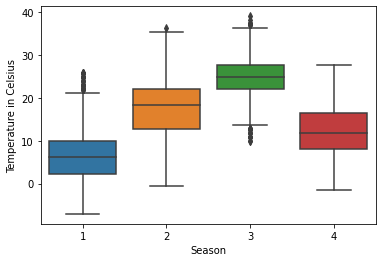

In [14]:
boxplot = sns.boxplot(data=df, x="season", y="temp_c")

boxplot.set(xlabel='Season', ylabel='Temperature in Celsius')
boxplot

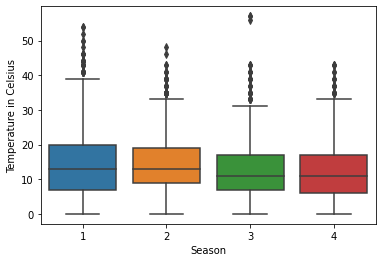

In [5]:
import seaborn as sns
boxplot = sns.boxplot(data=df, x="season", y="windspeed")

boxplot.set(xlabel='Season', ylabel='Average Windspeed')
boxplot

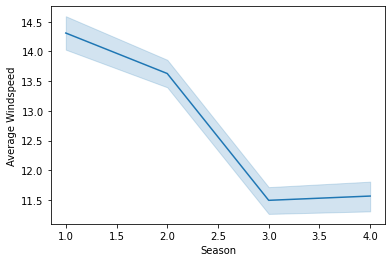

In [8]:
lineplot = sns.lineplot(data=df, x="season", y="windspeed")

lineplot.set(xlabel='Season', ylabel='Average Windspeed')
lineplot

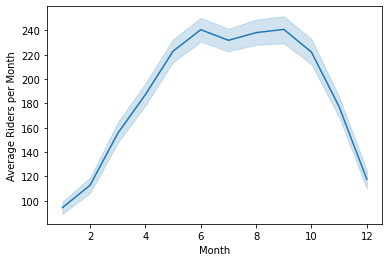

In [14]:
lineplot = sns.lineplot(data=df, x="month", y="total")

lineplot.set(xlabel='Month', ylabel='Average Riders per Month')
lineplot